# Downsampling

## Preparation

### Imports

In [77]:
import numpy as np
from scipy.io import wavfile
from scipy import signal
from numpy import fft
from matplotlib import pyplot as plt
import IPython

### Helper Functions

In [78]:
def plot_signal(x, fs, title=""):
    NFFT = 2 ** (len(x) - 1).bit_length() # Next power of 2 from length of x
    X = fft.fft(x, n=NFFT)
    X_abs = 2 * np.absolute(X) / len(x)
    half = int(NFFT/2)
    freq = fft.fftfreq(NFFT, d=1/fs)
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    fig.suptitle(title)
    ax[0].plot(freq[:half], X_abs[:half])
    ax[0].set_title(r'Single-Sided Amplitude Spectrum of $x(t)$')
    ax[0].set_xlabel('Frequency [Hz]')
    ax[0].set_ylabel(r'$|X(f)|$')
    ax[0].grid()
    ax[1].plot(x)
    ax[1].set_title(r'$x(t)$')
    ax[1].set_xlabel(r'$t$')
    ax[1].set_ylabel(r'$x(t)$')
    ax[1].grid()
    plt.show()


## Reading Source File

In [81]:
fs, sound = wavfile.read("res/sound.wav")

In [82]:
print("Sample Rate: %d" % fs)
print("%d samples" % len(sound))
file_time = len(sound) / fs
print("File Length: %.3f seconds, %dm %ds" % (file_time, file_time // 60, file_time % 60))
file_size = len(sound) * len(sound[0]) * 16 / 8
print("File Size: %.3fkB" % (file_size / 1024))

Sample Rate: 8000
268237 samples
File Length: 33.530 seconds, 0m 33s
File Size: 1047.801kB


$\text{File Length} = \frac{\text{Number of Samples}}{\text{Sample Rate}} = \frac{len(sound)}{fs}$

$\text{File Size}_{\text{(B)}} = \frac{\text{Number of Samples} * \text{Number of Channels} * \text{Number of bits in Each  Number}}{\text{Number of bits in Each Byte}} = \frac{len(sound) * 2 * 16}{8}$

## Convert to Mono

In [83]:
sound = np.array([np.average(sample) for sample in sound], dtype=np.int16)

In [84]:
print("Sample Rate: %d" % fs)
print("%d samples" % len(sound))
file_time = len(sound) / fs
print("File Length: %.3f seconds, %dm %ds" % (file_time, file_time // 60, file_time % 60))
file_size = len(sound) * 1 * 16 / 8
print("File Size: %.3fkB" % (file_size / 1024))

Sample Rate: 8000
268237 samples
File Length: 33.530 seconds, 0m 33s
File Size: 523.900kB


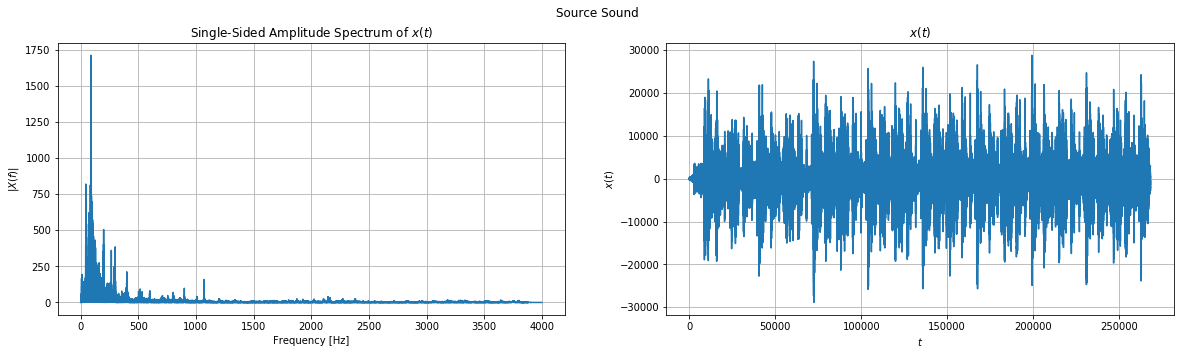

In [85]:
plot_signal(sound, fs, "Source Sound")

## Downsampling

In [86]:
def downsample(x, N=1):
    return x[np.array(np.arange(len(x)) % N == 0)]


In [87]:
compressed_sound = downsample(sound, 3)
compressed_fs = fs // 3

In [88]:
print("Sample Rate: %d" % compressed_fs)
print("%d samples" % len(compressed_sound))
file_time = len(compressed_sound) / compressed_fs
print("File Length: %.3f seconds, %dm %ds" % (file_time, file_time // 60, file_time % 60))
file_size = len(compressed_sound) * 1 * 16 / 8
print("File Size: %.3fkB" % (file_size / 1024))

Sample Rate: 2666
89413 samples
File Length: 33.538 seconds, 0m 33s
File Size: 174.635kB


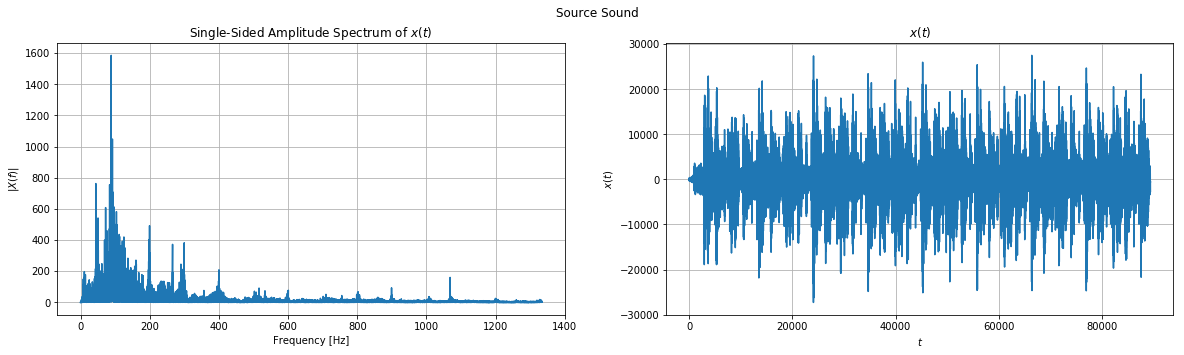

In [89]:
plot_signal(compressed_sound, compressed_fs, "Source Sound")

In [90]:
wavfile.write("res/result.wav", compressed_fs, compressed_sound)

In [91]:
IPython.display.Audio("res/result.wav")

The downsampling removed high frequency components of the signal. Thus the human ear could not recoginze such high frequency sounds, the downsampling did not reduce quality of the file in terms of audible sounds, while reduced file size to one-third.

Overall, the file size reduced to one-sixth of the source file.